# 量子コンピューティングのための線形代数の紹介

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from qiskit import *
from qiskit.visualization import plot_bloch_vector

### 序章

線形代数は量子コンピューティングの言語です。したがって、量子計算で見られる驚くべき興味深い構造の多くに到達するためには、線形代数が構築されている基本的な数学的概念を十分に理解することが重要です。このセクションの目標は、読者が量子コンピューティングの研究中に構築できる、線形代数の入門知識の基礎を作成することです。

### ベクトルとベクトル空間

まず、量子計算で最も重要な数学的量の1つであるベクトルについて説明することから、入門的な線形代数の調査を開始します。

正式には、**ベクトル**$ | v \ rangle $は、ベクトル空間と呼ばれる集合の要素として定義されます。より直感的で幾何学的な定義は、ベクトルは「方向と大きさの両方を持つ数学的量である」ということです。たとえば、$ \ begin {pmatrix} 3 \ 5 \ end {pmatrix} $の形式の$ x $および$ y $コンポーネントを持つベクトルについて考えてみます。このベクトルは、$ x $軸を下って$ 3 $単位、$ y $軸を上って$ 5 $単位の方向を指す矢印として視覚化できます。

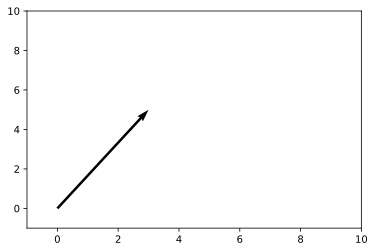

In [2]:
plt.figure()
ax = plt.gca()
ax.quiver([3], [5], angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])
plt.draw()
plt.show()

ベクトルの「テール」を原点に配置する必要はないことに注意してください。正しい方向を指すだけです。

量子コンピューティングでは、特定の量子状態に対応する空間内の特定の点を指す単純な**ベクトルである状態ベクトルを扱うことがよくあります。**これは、ブロッホ球を使用して視覚化できます。たとえば、量子系の状態を表すベクトルは、ブロッホ球の内側に囲まれた次の矢印のようになります。これは、状態ベクトルが「指す」ことができるすべての可能な点のいわゆる「状態空間」です。

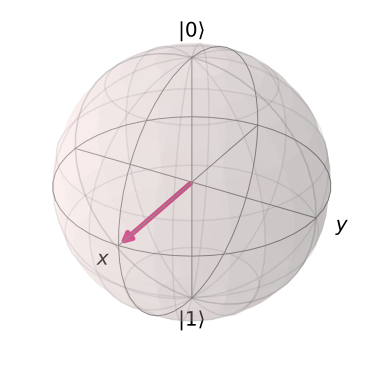

In [3]:
plot_bloch_vector([1, 0, 0])

この特定の状態は、$ | 0 \ rangle $と$ | 1 \ rangle $の間の均等な重ね合わせに対応します（矢印は、球の上部の$ | 0 \ rangle $と下部の$ | 1 \ rangle $の中間にあります。 ）。私たちのベクトルは球の表面のどこでも回転することができ、これらの点のそれぞれは異なる量子状態を表しています。

ベクトルのより正式な定義をもう一度見てみましょう。つまり、ベクトルはベクトル空間の要素です。ここで、ベクトル空間を定義する必要があります。**体**$ F $上の**ベクトル空間**$ V $は、2つの条件が成り立つオブジェクト（ベクトル）のセットです。まず、 **2つのベクトル$ | a \ rangle、\ | b \ rangle \ \ in \ V $のベクトル加算**により、3番目のベクトル$ | a \ rangle \ + \ | b \ rangle \ = \ | c \ rangle $、 $ V $にも含まれています。 2番目の条件は、$ n | a \ rangle $で表される$ | a \ rangle \ \ in \ V $と$ n \ \ in \ F $の間の**スカラー乗法も$ V $内に含まれることです。**

ここで、基本的な例を使用して、この以前の定義を明確にします。フィールド$ \ mathbb {R} $上の集合$ \ mathbb {R} ^ 2 $がベクトル空間であることを示しましょう。私たちはそれを主張します

<br>

$$ \ begin {pmatrix} x_1 \ y_1 \ end {pmatrix} \ + \ \ begin {pmatrix} x_2 \ y_2 \ end {pmatrix} \ = \ \ begin {pmatrix} x_1 \ + \ x_2 \ y_1 \ + \ y_2 \ end {pmatrix} $$

<br>

$ \ mathbb {R} ^ 2 $内に含まれています。 2つの実数の合計が実数であり、新しく形成されたベクトルの両方のコンポーネントが実数になるため、これは明らかに当てはまります。したがって、ベクトルは定義上$ \ mathbb {R} ^ 2 $に含まれています。また、次のことも主張します。

<br>

$$ n | v \ rangle \ = \ \ begin {pmatrix} nx \ ny \ end {pmatrix} \ \ in \ V \ \ \ \ \ forall n \ \ in \ \ mathbb {R} $$

<br>

実数と実数の積は実数であるため、これも当てはまり、新しいベクトル全体が実数になり、このステートメントが証明されます。

### 行列と行列演算

別の基本的な概念である**行列に**注意を向けましょう。行列は、ベクトルを他のベクトルに変換する数学的オブジェクトです。

<br>

$$ | v \ rangle \ \ rightarrow \ | v '\ rangle \ = \ M | v \ rangle $$

<br>

一般に、行列は数値の「配列」として記述され、次のようになります。

<br>

$$ M \ = \ \ begin {pmatrix} 1＆-2＆3 \ 1＆5i＆0 \ 1 \ + \ i＆7＆-4 \ end {pmatrix} $$

<br>

行列の乗算を実行することにより、行列をベクトルに「適用」できます。一般に、2つの行列間の行列乗算では、最初の行列の最初の行を取得し、各要素に2番目の行列の最初の列の「パートナー」を乗算します（行の最初の数値に列、行の2番目の番号、列の2番目の番号など）。これらの新しい数値の合計が、新しい行列の最初の行の最初の要素になります。最初の行の残りを埋めるために、2番目のマトリックスの2番目、3番目などの列に対してこのプロセスを繰り返します。次に、最初の行列の2番目の行を取得し、2番目の行列の各列に対してこのプロセスを繰り返して、2番目の行を生成します。最初の行列のすべての行を使用するまで、このプロセスを実行します。結果の行列は、新しい行列です。次に例を示します。

<br>

$$ \ begin {pmatrix} 2＆0 \ 5＆-1 \ end {pmatrix} \ begin {pmatrix} -3＆1 \ 2＆1 \ end {pmatrix} \ = \ \ begin {pmatrix}（2）（ -3）+（0）（2）＆（2）（1）\ + \（0）（1）\（5）（-3）+（-1）（2）＆（5）（1）\ + \（-1）（1）\ end {pmatrix} \ = \ \ begin {pmatrix} -6＆2 \ -17＆4 \ end {pmatrix} $$

<br>

量子計算を実行するために、行列をそのベクトルに適用することによって操作する量子状態ベクトルがあります。ベクトルは、1つの列を持つ単純な行列です。したがって、行列をベクトルに適用するには、上記と同じ行列乗算手順に従います。**量子ゲートの**シーケンスを適用することにより、量子コンピューターで量子ビットを操作します。各量子ゲートは、状態ベクトルに適用できる行列として表すことができるため、状態が変化します。たとえば、一般的に見られる量子ゲートはPauli-Xゲートであり、次の行列で表されます。

<br>

$$ \ sigma_x \ = \ \ begin {pmatrix} 0＆1 \ 1＆0 \ end {pmatrix} $$

<br>

このゲートは、従来のNOT論理ゲートと同様に機能します。計算基底状態$ | 0 \ rangle $を$ | 1 \ rangle $にマップし、$ | 1 \ rangle $を$ | 0 \ rangle $にマップします（状態を「反転」します）。 2つの基底状態を列ベクトルとして記述します。

<br>

$$ | 0 \ rangle \ = \ \ begin {pmatrix} 1 \ 0 \ end {pmatrix} \ \ \ \ \ \ \ | 1 \ rangle \ = \ \ begin {pmatrix} 0 \ 1 \ end {pmatrix} $ $

<br>

この行列を各ベクトルに適用すると、次のようになります。

<br>

$$ \ sigma_x | 0 \ rangle \ = \ \ begin {pmatrix} 0＆1 \ 1＆0 \ end {pmatrix} \ begin {pmatrix} 1 \ 0 \ end {pmatrix} \ = \ \ begin {pmatrix}（ 0）（1）\ + \（1）（0）\（1）（1）\ + \（0）（0）\ end {pmatrix} \ = \ \ begin {pmatrix} 0 \ 1 \ end {pmatrix } \ = \ | 1 \ rangle $$

<br>

$$ \ sigma_x | 1 \ rangle \ = \ \ begin {pmatrix} 0＆1 \ 1＆0 \ end {pmatrix} \ begin {pmatrix} 0 \ 1 \ end {pmatrix} \ = \ \ begin {pmatrix}（ 0）（0）\ + \（1）（1）\（1）（0）\ + \（0）（1）\ end {pmatrix} \ = \ \ begin {pmatrix} 1 \ 0 \ end {pmatrix } \ = \ | 0 \ rangle $$

<br>

行列は、期待どおりに状態ベクトルに作用します。

**量子計算では、エルミート**行列と**ユニタリ**行列という2つの重要なタイプの行列に遭遇することがよくあります。前者は量子力学の研究ではより重要ですが、量子計算の研究ではまだ議論する必要があります。後者は、量子力学と量子計算の両方で比類のない重要性を持っています。線形代数のこのセクションから1つの概念だけを取り上げる場合、それはユニタリ行列の概念である必要があります。

エルミート行列は、その**共役転置に**等しい単純な行列です（$ \ dagger $記号で示されます）。これは、エルミート行列の虚数成分の符号を反転し、そのエントリを主対角線に沿って（左上隅から右下隅に）反映すると、等しい行列が生成されることを意味します。たとえば、量子計算で一般的に使用されるPauli-Y行列は、エルミート行列です。

<br>

$$ \ sigma_y \ = \ \ begin {pmatrix} 0＆-i \ i＆0 \ end {pmatrix} \ \ Rightarrow \ \ sigma_y ^ {\ dagger} \ = \ \ begin {pmatrix} 0＆-（i） \-（-i）＆0 \ end {pmatrix} \ = \ \ begin {pmatrix} 0＆-i \ i＆0 \ end {pmatrix} \ = \ \ sigma_y $$

<br>

$ i $と$ -i $の場所を切り替えて（主対角線を横切って反射するため、ゼロは変更されないままです）、符号を反転したことに注目してください。

ユニタリ行列は非常に似ています。具体的には、**逆行列**が元の行列の共役転置に等しいような行列です。

$ A ^ {-1} $として示される、ある行列$ A $の逆行列は、次のような行列です。

<br>

$$ A ^ {-1} A \ = \ AA ^ {-1} \ = \ \ mathbb {I} $$

<br>

ここで、$ \ mathbb {I} $は単位行列です。単位行列には、主対角線（左上から右下）に沿って$ 1 $ sがあり、他のすべての場所に$ 0 $ sがあります。これは、他のマトリックスに自明に作用するため、単位行列と呼ばれます（効果はありません）。単位行列に他の行列を掛けることで、これを自分で証明できます。

行列が$ 2 \ \ times \ 2 $より大きくなると、逆行列の計算は十分に複雑になるため、通常はコンピューターに計算を任せます。 $ 2 \ \ times \ 2 $行列の場合、逆行列は次のように定義されます。

<br>$$ A \ = \ \ begin {pmatrix} a＆b \\ c＆d \ end {pmatrix} \ \ Rightarrow \ A ^ {-1} \ = \ \ frac {1} {\ text {det} \ A } \ begin {pmatrix} d＆-b \\ -c＆a \ end {pmatrix}、$$<br>

ここで、$ \テキスト{DETは} \ A $は行列の**行列**式です。 $ 2 \ \ times \ 2 $の場合、$ \ text {det} \ A \ = \ ad \-\ bc $。

逆行列の計算は、量子コンピューティングではめったに重要ではありません。私たちが遭遇する行列のほとんどはユニタリであるため、逆行列は共役転置をとることによって単純に与えられると仮定できます。

基本的な例を見てみましょう。パウリY行列は、エルミートであることに加えて、ユニタリ行列でもあります（共役転置に等しく、その逆行列にも等しいため、パウリY行列はそれ自体の逆行列です！）。この行列が実際に単一であることを確認できます。

<br>

$$ \ sigma_y \ = \ \ begin {pmatrix} 0＆-i \ i＆0 \ end {pmatrix} \ \ \ \ \ \ sigma_y ^ {\ dagger} \ = \ \ begin {pmatrix} 0＆-i \ i＆0 \ end {pmatrix} \ \ Rightarrow \ \ sigma_y ^ {\ dagger} \ sigma_y \ = \ \ begin {pmatrix}（0）（0）+（-i）（i）＆（0）（-i ）\ + \（-i）（0）\（i）（0）\ + \（0）（i）＆（i）（-i）\ + \（0）（0）\ end {pmatrix} \ = \ \ begin {pmatrix} 1＆0 \ 0＆1 \ end {pmatrix} \ = \ \ mathbb {I} $$

<br>

ユニタリ行列が重要である理由は、ヒルベルト空間のセクションでより明らかになり、この教科書の量子力学のサブトピックでさらに明らかになります。基本的な考え方は、ユニタリ行列の適用による量子状態の進化は、量子状態のノルム（大きさ）を「保存」するというものです。

### スパニングセット、線形依存、およびベース

これで、ベクトル空間の構築について議論できるようになりました。いくつかのベクトル空間$ V $を考えてみましょう。含まれているベクトルの**線形結合**として部分空間に任意のベクトルを書き込むことができる場合、ベクトルのいくつかのセット$ S $はベクトル空間の部分空間$ V_S \ \ subset \ V $（ベクトル空間操作で閉じられたサブセット）にまたがると言います。スパニングセット内。

体$ F $上のいくつかのベクトル空間におけるいくつかのコレクションベクトル$ | v_1 \ rangle、\ ...、\ | v_n \ rangle $の線形結合は、これらのベクトルの任意の合計として定義されます（もちろん別のベクトルになります） $ | v \ rangle $と呼ぶベクトル）：

<br>

$$ | v \ rangle \ = \ f_1 | v_1 \ rangle \ + \ f_2 | v_2 \ rangle \ + \ ... \ + \ f_n | v_n \ rangle \ = \ \ displaystyle \ sum_ {i} \ f_i | v_i \ rangle $$

<br>

ここで、各$ f_i $は$ F $の要素です。空間にまたがるベクトルのセットがある場合**、ベクトル空間内の他のベクトル**は、これらのベクトルの線形結合として記述できると言っています。

ベクトルのセット$ | v_1 \ rangle、\ ...、\ | v_n \ rangle $は、各ベクトル$ b_i \ \ in \ F $に対応する係数が存在する場合、**線形従属であると言われます。**

<br>

$$ b_1 | v_1 \ rangle \ + \ b_2 | v_2 \ rangle \ + \ ... \ + \ b_n | v_n \ rangle \ = \ \ displaystyle \ sum_ {i} \ b_i | v_i \ rangle \ = \ 0、 $$

<br>

ここで、$ b_i $係数の少なくとも1つがゼロ以外です。これは、「ベクトルのセットは相互の線形結合として表現できる」というより直感的なステートメントに相当します。たとえば、線形のように、対応する係数$ {b_1、\ ...、\ b_n} $とともにセット$ {| v_1 \ rangle、\ ...、\ | v_n \ rangle} $があるとします。組み合わせは$ 0 $に等しくなります。係数がゼロ以外のベクトルが少なくとも1つあるため、線形結合$ b_a | v_a \ rangle $の項を選択します。

<br>

$$ \ displaystyle \ sum_ {i} \ b_i | v_i \ rangle \ = \ b_a | v_a \ rangle \ + \ \ displaystyle \ sum_ {i、\ i \ \ neq \ a} \ b_i | v_i \ rangle \ = \ 0 \ \ Rightarrow \ | v_a \ rangle \ = \-\ displaystyle \ sum_ {i、\ i \ \ neq \ a} \ \ frac {b_i} {b_a} | v_i \ rangle \ = \ \ displaystyle \ sum_ {i 、\ i \ \ neq \ a} \ c_i | v_i \ rangle $$

<br>

$ b_a $が唯一の非ゼロ係数である場合、$ | v_a \ rangle $がヌルベクトルであることは必然的に真であり、セットは自動的に線形従属になります。そうでない場合、$ | v_a \ rangle $は、上に示したように、ゼロ以外のベクトルの線形結合として記述されています。逆を証明するために、部分空間$ | v_1 \ rangle、...、\ | v_n \ rangle $に、他のベクトルの線形結合として記述できるベクトル$ | v_a \ rangle $が存在すると仮定します。部分空間。この意味は：

<br>

$$ | v_a \ rangle \ = \ \ displaystyle \ sum_ {s} b_s | v_s \ rangle $$

<br>

ここで、$ s $は、部分空間のサブセット上で実行されるインデックスです。したがって、次のようになります。

<br>

$$ | v_a \ rangle \-\ \ displaystyle \ sum_ {s} b_s | v_s \ rangle \ = \ | v_a \ rangle \-\（b_1 | v_ {s_1} \ rangle \ + \ ... \ + \ b_r | v_ {s_r} \ rangle）\ = \ 0 $$

<br>

$ s $でインデックス付けされたサブセットに含まれていない部分空間内のすべてのベクトルについて、$ q $でインデックス付けされた係数を$ 0 $に設定します。したがって、

<br>

$$ | v_a \ rangle \-\（b_1 | v_ {s_1} \ rangle \ + \ ... \ + \ b_r | v_ {s_r} \ rangle）\ + \（0）（| v_ {q_1} \ rangle \ + \ ... \ + \ | v_ {q_t} \ rangle）\ = \ 0 $$

<br>

これは、部分空間$ | v_1 \ rangle、\ ...、\ | v_n \ rangle $内のすべての要素の線形結合です。これは$ 0 $に等しいので、線形依存の2つの定義が相互に関係しているという証明が完成します。

ここで、基本的な例を考えてみましょう。 $ | a \ rangle \ = \ \ begin {pmatrix} 1 \ 0 \ end {pmatrix} $と$ | b \ rangle \ = \で構成される$ \ mathbb {R} ^ 2 $の2つのベクトルのセットについて考えてみます。 \ begin {pmatrix} 2 \ 0 \ end {pmatrix} $。ベクトル空間上のフィールドを$ \ mathbb {R} $に選択すると、$ 0 $に相当するこれらのベクトルの線形結合を作成できます。例えば：

<br>

$$ 2 | a \ rangle \-\ | b \ rangle \ = \ 0 $$

<br>

他のすべての線形結合として表現できるベクトルがセットにない場合**、ベクトルのセットは線形独立**であると言われます。

**基底**の概念は、単純に**線形独立のスパニングセット**です。この意味で、ベクトル空間の基礎は、空間全体にまたがる可能な最小のセットです。基底関数系のサイズをベクトル空間の**次元と呼びます。**

ベースとスパニングセットは、ベクトル空間を「縮小」し、少数のベクトルのみで表現できるため、重要です。空間内のすべてのベクトルが基底ベクトルの線形結合であることがわかっているという理由だけで、ベクトル空間全体に一般化できる基底関数系について特定の結論に達することができます。

量子計算では、私たちがよく遭遇する基底の1つは、$ | 0 \ rangle、\ | 1 \ rangle $です。これらの基底ベクトルの線形結合として、他のキュービット状態を書くことができます。たとえば、線形結合

<br>

$$ \ frac {| 0 \ rangle \ + \ | 1 \ rangle} {\ sqrt {2}} $$

<br>

$ | 0 \ rangle $と$ | 1 \ rangle $の基底状態の重ね合わせを表し、状態を測定して基底ベクトル状態のいずれかにある確率を等しくします（これは「重み」または線形結合の「各基底ベクトルの量」は等しく、両方とも$ 1 / \ sqrt {2} $でスケーリングされます。

### ヒルベルト空間、正規直交性、および内積

ヒルベルト空間は、量子力学と量子計算において最も重要な数学的構成要素の1つです。ヒルベルト空間は、すべての量子状態ベクトルが「生きている」状態空間と考えることができます。ヒルベルト空間と任意のランダムベクトル空間の主な違いは、ヒルベルト空間には**内積**が装備されていることです。これは、2つのベクトル間で実行できる演算であり、スカラーを返します。

量子力学と量子計算のコンテキストでは、2つの状態ベクトル間の内積は、最初のベクトルが2番目のベクトルに沿って存在する量を表すスカラー量を返します。これから、（とりわけ）さまざまな量子状態での測定の確率を計算できます（これについては、量子力学のサブトピックで詳しく説明します）。

ヒルベルト空間の2つのベクトル$ | a \ rangle $と$ | b \ rangle $の場合、内積を$ \ langle a |と表します。 b \ rangle $、ここで$ \ langle a | $は、$ | a \ rangle $の共役転置に等しく、$ | a \ rangle ^ {\ dagger} $で表されます。したがって、ヒルベルト空間の2つのベクトル間の内積は次のようになります。

<br>

$$ \ langle a | b \ rangle \ = \ \ begin {pmatrix} a_1 ^ { *}＆a_2 ^ {* }＆...＆a_n ^ { *} \ end {pmatrix} \ begin {pmatrix} b_1 \ b_2 \。 \。 \。 \ b_n \ end {pmatrix} \ = \ a_1 ^ {* } b_1 \ + \ a_2 ^ { *} b_2 \ + \ ... \ + \ a_n ^ {* } b_n $$

<br>

ここで、$ * $はベクトルの複素共役を示します。

量子系を表すヒルベルト空間の最も重要な条件の1つは、ベクトルとそれ自体の内積が1に等しいことです。$ \ langle \ psi | \ psi \ rangle \ = \ 1 $。これはいわゆる正規化条件であり、ベクトルの2乗の長さ（内積の定義により、ベクトルの各コンポーネントは2乗され、合計されます）は1に等しくなければなりません。これの物理的な重要性は、特定の方向のベクトルの長さが、その特定の状態での測定に関する量子システムの「確率振幅」を表すことです。明らかに、量子システムがその状態で測定される確率は$ 1 $でなければなりません（結局のところ、特定の状態で量子システムを見つける確率の合計は$ 1 $に等しくなければなりません）。

ブロッホ球について考えてみましょう。

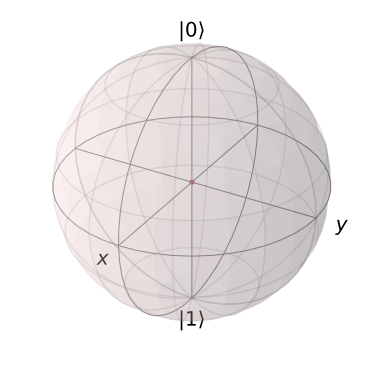

In [4]:
plot_bloch_vector([0, 0, 0])

この球の表面は、キュービット状態ベクトル間の内積とともに、有効なヒルベルト空間です。さらに、ブロッホ球の半径が$ 1 $であるため、正規化条件が当てはまります。したがって、各ベクトルの2乗の長さも$ 1 $に等しくなければなりません。

ヒルベルト空間と内積に関する最後の注意点は、**ユニタリ行列**との関係です。**ユニタリ行列は、内積**を保持するため、量子計算において重要です。つまり、ユニタリ行列のシーケンスの下でベクトルをどのように変換しても、正規化条件は引き続き当てはまります。これは、次の短い証明で実証できます。

<br>

$$ \ langle \ psi | \ psi \ rangle \ = \ 1 \ \ Rightarrow \ | \ psi \ rangle \ \ rightarrow \ U | \ psi \ rangle \ = \ | \ psi '\ rangle \ \ Rightarrow \ \ langle \ psi' | \ psi '\ rangle \ = \（U | \ psi \ rangle）^ {\ dagger} U | \ psi \ rangle \ = \ \ langle \ psi | U ^ {\ dagger} U | \ psi \ rangle \ = \ \ langle \ psi | \ psi \ rangle \ = \ 1 $$

<br>

これは、単一進化が量子状態を他の有効な量子状態に送ることを意味します。ブロッホ球で表される単一キュービットのヒルベルト空間の場合、ユニタリ変換は、球上のさまざまな点への状態ベクトルの回転に対応し、状態ベクトルの長さはまったく変更されません。

### 外積とテンソル積

ベクトルを乗算する方法は内積だけではありません。時折、ブラとケットの順序を切り替えて、結果が単一の数値ではなく行列になる**外積を取得します。**ヒルベルト空間の2つのベクトル$ | a \ rangle $と$ | b \ rangle $の場合、外積を$ |と表します。 a \ rangle $$ \ langle b | $、ここで$ \ langle b | $は、前と同じように$ | b \ rangle $の共役転置に等しい。これは私たちを取得します：

<br>

$$ | a \ rangle \ langle b | \ = \ \ begin {pmatrix} a_1 \ a_2 \ \ vdots \ a_n \ end {pmatrix} \ begin {pmatrix} b_1 ^ { *}＆b_2 ^ {* }＆\ cdots＆b_n ^ { *} \ end {pmatrix} \ = \ begin {pmatrix} a_1 b_1 ^ {* }＆a_1 b_2 ^ { *}＆\ cdots＆a_1 b_n ^ {* } \ a_2 b_1 ^ { *}＆a_2 b_2 ^ {* } ＆＆ \ vdots \ \ vdots ＆＆ \ ddots＆\ vdots \ a_n b_1 ^ { *}＆\ cdots＆\ cdots＆a_n b_n ^ {* } \ end {pmatrix} $$

<br>

外積は、行列ではなく、ブラとケットで量子ゲートを表現する方法を提供します。たとえば、Pauli-Xゲートを考えてみましょう。

<br>

$$ \ sigma_x \ = \ \ begin {pmatrix} 0＆1 \ 1＆0 \ end {pmatrix} $$

<br>

これは、次の理由から、合計$ | 0 \ rangle $$ \ langle 1 | $ + $ | 1 \ rangle $$ \ langle 0 | $として表すことができます。

<br>

$$ | 0 \ rangle \ langle 1 | \ + \ | 1 \ rangle \ langle 0 | \ = \ \ begin {pmatrix} 1 \ 0 \ end {pmatrix} \ begin {pmatrix} 0＆1 \ end {pmatrix} + \ begin {pmatrix} 0 \ 1 \ end {pmatrix} \ begin {pmatrix} 1＆ 0 \ end {pmatrix} \ = \ \ begin {pmatrix} 0＆1 \ 0＆0 \ end {pmatrix} + \ begin {pmatrix} 0＆0 \ 1＆0 \ end {pmatrix} \ = \ \ begin { pmatrix} 0＆1 \ 1＆0 \ end {pmatrix} \ = \ \ sigma_x $$

<br>

実際、外積は、ベクトル空間を乗算するために使用される**より一般的なテンソル積の特定の例です。**

ほとんどの場合、2つ以上のキュービットの共有状態を記述するために使用されるテンソル積が表示されます。ここで、テンソル積は、外積のようにベクトルの共役転置の1つを取る必要がないことに注意してください。つまり、ケッツとブラの代わりに2つのケッツを乗算しています。 $ | a \ rangle \ otimes | b \ rangle $または$ | ab \ rangle $と書かれた、ベクトル$ | a \ rangle $と$ | b \ rangle $のテンソル積は次のようになります。


<br>


$$ | a \ rangle \ otimes | b \ rangle \ = \ \ begin {pmatrix} a_ {1} \ begin {pmatrix} b_ {1} \ b_ {2} \ end {pmatrix} \ a_ {2} \ begin {pmatrix} b_ {1} \ b_ {2} \ end {pmatrix} \ end {pmatrix} \ = \ begin {pmatrix} a_ {1} b_ {1} \ a_ {1} b_ {2} \ a_ {2 } b_ {1} \ a_ {2} b_ {2} \ end {pmatrix} $$

<br>

$ | a \ rangle $と$ | b \ rangle $のテンソル積によって生成された新しいベクトルに作用したい場合は、それらに作用したい演算子のテンソル積も使用する必要があります。 。行列Aと*B*のテンソル積は次*のように*なります。

<br>

$$ A \ otimes B \ = \ \ begin {pmatrix} a_ {11} B＆\ cdots＆a_ {1n} B \ \ vdots＆\ ddots＆\ vdots \ a_ {m1} B＆\ cdots＆a_ {mn } B \ end {pmatrix} $$

<br>

[ここ](https://qiskit.org/textbook/ch-gates/multiple-qubits-entangled-states.html#1.-Representing-Multi-Qubit-States-)で、実際のテンソル積の例を見つけることができます。

### 固有ベクトルと固有値

フォームの関係を検討してください。

$$ A | v \ rangle \ = \ \ lambda | v \ rangle、$$

ここで、$ A $は行列で、$ \ lambda $はいくつかの数値です。行列$ A $が与えられ、この関係を満たすベクトル$ | v \ rangle $と数値$ \ lambda $を見つける必要がある**場合**、これらのベクトルを固有ベクトルと呼び、対応する数値乗数を**固有値**と呼びます。固有ベクトルと固有値は、量子力学、したがって量子計算のコンテキストで非常に重要な物理的重要性を持っています。いくつかの$ A $が与えられた場合、固有ベクトルと対応する固有値のセットを見つけるために、興味深いトリックを利用します。方程式を次のように並べ替えましょう。

<br>

$$ A | v \ rangle \-\ \ lambda | v \ rangle \ = 0 \ \ Rightarrow \（A \-\ \ lambda \ mathbb {I}）| v \ rangle \ = \ 0 $$

<br>

この方程式の両辺に逆行列$（A \-\ \ lambda \ mathbb {I}）^ {-1} $を掛けると、$ | v \ rangle \ = \ 0 $が得られます。これは無関係な解決策です（固有ベクトルをヌルベクトルにすることはできません。そうしないと、固有値と行列の組み合わせが固有ベクトルと固有値の関係を満たします）。したがって、許可された固有ベクトルと固有値を見つけるために、行列$（A \-\ \ lambda \ mathbb {I}）$が**非可逆である**と仮定する必要があります。前から、行列の逆行列は次の形式であることを思い出してください。

<br>$$ M ^ {-1} \ = \ \ frac {1} {\ text {det}（M）} \ F（M）、$$<br>

ここで、$ F（M）$は、$ M $に依存するいくつかの新しいマトリックス（このコンテキストでは詳細は重要ではありません）です。この方程式の中で私たちが関心を持っている部分は、行列式の逆です。行列$ M $の行列式が$ 0 $の場合、逆行列は定義されていないため、逆行列も定義されていないため、行列$ M $は反転できません。したがって、次のことが必要です。

<br>

$$ \ text {det}（A \-\ \ lambda \ mathbb {I}）\ = \ 0 $$

<br>

これから、$ \ lambda $を決定し、$ \ lambda $の各値を元の方程式に代入して、固有ベクトルを取得します。例を挙げて、Pauli-Z行列$ \ sigma_z $の固有ベクトル/固有値を見つけましょう。まず、次のことから始めます。

<br>

$$ \ text {det}（\ sigma_z \-\ \ lambda \ mathbb {I}）\ = \ \ text {det} \ begin {pmatrix} 1 \-\ \ lambda＆0 \ 0＆-1 \-\ \ lambda \ end {pmatrix} \ = \（-1 \-\ \ lambda）（1 \-\ \ lambda）\ = \ 1 \-\ \ lambda ^ 2 \ = \ 0 \\右矢印\\ lambda \ = \ \ pm 1 $$

<br>

行列式を解くときに得られる$ \ lambda $に関する方程式は、**特性多項式**と呼ばれます。次に、これらの各値を元の方程式に戻すことができます。 $ \ lambda \ = \ 1 $から始めます。

<br>

$$ \ begin {pmatrix} 1＆0 \ 0＆-1 \ end {pmatrix} | v \ rangle \ = \ | v \ rangle \ \ Rightarrow \ \ begin {pmatrix} 1＆0 \ 0＆-1 \ end {pmatrix} \ begin {pmatrix} a \ b \ end {pmatrix} \ = \ \ begin {pmatrix} a \ b \ end {pmatrix} \ \ Rightarrow \ begin {pmatrix} a \ -b \ end {pmatrix} \ = \ \ begin {pmatrix} a \ b \ end {pmatrix} $$

<br>

$ a $は任意の数にすることができ、$ b $は$ 0 $です。したがって、ベクトル$ \ begin {pmatrix} 1 \ 0 \ end {pmatrix} $は、関係を満たすすべてのベクトルの基底を形成します。したがって、$ 1 $の固有値に対応する固有ベクトルです。 $ \ lambda \ = \ -1 $に対して同じことを行います。

<br>

$$ \ begin {pmatrix} 1＆0 \ 0＆-1 \ end {pmatrix} | v \ rangle \ = \-| v \ rangle \ \ Rightarrow \ \ begin {pmatrix} 1＆0 \ 0＆-1 \ end {pmatrix} \ begin {pmatrix} a \ b \ end {pmatrix} \ = \ \ begin {pmatrix} -a \ -b \ end {pmatrix} \ \ Rightarrow \ begin {pmatrix} a \ -b \ end { pmatrix} \ = \ \ begin {pmatrix} -a \ -b \ end {pmatrix} $$

<br>

今回は、$ b $は任意の数にすることができ、$ a $は$ 0 $です。したがって、基底ベクトル（および$ -1 $に対応する固有ベクトル）は$ \ begin {pmatrix} 0 \ 1 \ end {pmatrix} $です。 Pauli-Z行列の固有ベクトルが量子計算基底状態$ | 0 \ rangle $および$ | 1 \ rangle $であることに注意してください。これは偶然ではありません。たとえば、$ Z $ベースでキュービットを測定する場合、キュービットの状態をZ行列の固有ベクトルの1つ（$ | 0 \ rangle $または$ | 1 \ rangle）に折りたたむ測定を指します。 $。

### 行列指数

行列指数の概念は、非常に具体的ですが、非常に重要な概念です。ユニタリ変換は次の形式でよく見られます。

<br>$$ U \ = \ e ^ {i \ gamma H}、$$<br>

ここで、$ H $はエルミート行列で、$ \ gamma $は実数です。この形式のすべての行列がユニタリであることを証明するのはかなり簡単です。 $ U $の共役転置をとると、次のようになります。

<br>

$$ U ^ {\ dagger} \ = \ \ Big（e ^ {i \ gamma H} \ Big）^ {\ dagger} \ = \ e ^ {-i \ gamma H ^ {\ dagger}} $$

<br>

しかし、$ H $はエルミートであるため、$ H ^ {\ dagger} \ = \ H $であることがわかります。したがって、次のようになります。

<br>

$$ e ^ {-i \ gamma H ^ {\ dagger}} \ = \ e ^ {-i \ gamma H} \ \ Rightarrow \ U ^ {\ dagger} U \ = \ e ^ {-i \ gamma H } e ^ {i \ gamma H} \ = \ \ mathbb {I} $$

<br>

指数内の行列がまだ行列と見なされるのはなぜか疑問に思われるかもしれません。テイラー級数として指数関数を拡張すると、答えがより明確になります。テイラー級数は本質的に任意の関数を無限次多項式として記述する方法であり、主なアイデアは多項式の項を選択し、試行している関数上にあるある点$ x_0 $の中心に置くことです。 0次、1次、2次、3次などの導関数が元の関数と多項式の両方で同じになるように、多項式に変換します。したがって、テイラー級数は次の形式で記述します。

<br>$$ g（x）\ = \ \ displaystyle \ sum_ {n \ = \ 0} ^ {\ infty} \ f ^ {（n）}（x_0）\ \ frac {（x \-\ x_0）^ n} {n！}、$$<br>

ここで、$ g（x）$は多項式、$ f（x）$は元の関数、$ f ^ {（n）} $は$ f $の$ n $次導関数、$ x_0 $は関数を中心にするポイント。近似していないので、$ x_0 $は重要ではありません。したがって、簡単にするために、$ x_0 \ = \ 0 $を選択すると、テイラー級数はマクラウリン級数になります。

<br>

$$ g（x）\ = \ \ displaystyle \ sum_ {n \ = \ 0} ^ {\ infty} \ f ^ {（n）}（0）\ \ frac {x ^ n} {n！} $$

<br>

$ f（x）\ = \ e ^ x $を選択すると、Maclaurin級数を使用して同等の多項式を作成できます。 $ e ^ x $の導関数は単純に$ e ^ x $であり、明らかに$ e ^ 0 \ = \ 1 $であるため、次のようになります。

<br>

$$ g（x）\ = \ \ displaystyle \ sum_ {n \ = \ 0} ^ {\ infty} \ \ frac {x ^ n} {n！} \ = \ e ^ x $$

<br>

したがって、ある行列$ i \ gamma H $の場合、次のようになります。

<br>

$$ e ^ {i \ gamma H} \ = \ \ displaystyle \ sum_ {n \ = \ 0} ^ {\ infty} \ \ frac {（i \ gamma H）^ n} {n！} $$

<br>

したがって、行列の指数は行列です。これは行列の累乗の無限の合計であり、明らかに過度に複雑に見えます...しかし、ここでのポイントは、行列指数が実際に行列であるということです。

これで、非常に重要な事実を示すことができます。$ B ^ 2 \ = \ \ mathbb {I} $のような行列$ B $がある場合（これは**対合行列**と呼ばれます）、次のようになります。

<br>

$$ e ^ {i \ gamma B} \ = \ \ cos（\ gamma）\ mathbb {I} \ + \ i \ sin（\ gamma）B $$

<br>

Maclaurin級数から始めます。

<br>

$$ e ^ {i \ gamma B} \ = \ \ displaystyle \ sum_ {n \ = \ 0} ^ {\ infty} \ \ frac {（i \ gamma B）^ n} {n！} $$

<br>

合計の各項で$ n $が偶数か奇数かに基づいて、合計を虚数部と実数部に分割できることに注意してください。

<br>

$$ \ displaystyle \ sum_ {n \ = \ 0} ^ {\ infty} \ \ frac {（i \ gamma B）^ n} {n！} \ = \ \ displaystyle \ sum_ {n \ = \ 0} ^ {\ infty} \ \ frac {（-1）^ n \ gamma ^ {2n} B ^ {2n}} {（2n）！} \ + \ i \ displaystyle \ sum_ {n \ = \ 0} ^ {\ infty} \ frac {（-1）^ n \ gamma ^ {2n + 1} B ^ {2n + 1}} {（2n + 1）！} $$

<br>

ここで、$ \ sin x $と$ \ cos x $の両方のMaclaurin級数を見つけましょう。 $ f（x）\ = \ \ sin x $から始めます。

<br>

$$ \ sin x \ = \ \ displaystyle \ sum_ {n \ = \ 0} ^ {\ infty} \ f ^ {n}（0）\ frac {x ^ n} {n！} $$

<br>

$ \ sin x $の導関数は**、ある意味で循環的**です（各矢印は前の関数の導関数を取ることを表します）。

<br>

$$ \ sin x \ \ rightarrow \ \ cos x \ \ rightarrow \-\ sin x \ \ rightarrow \-\ cos x \ \ rightarrow \ \ sin x $$

<br>

$ \ sin（0）\ = \ 0 $および$ \ cos（0）\ = \ 1 $なので、$ n $を含むすべての項は$ 0 $になり、次のようになります。

<br>

$$ \ displaystyle \ sum_ {n \ = \ 0} ^ {\ infty} \ f ^ {n}（0）\ frac {x ^ n} {n！} \ = \ \ displaystyle \ sum_ {n \ = \ 0} ^ {\ infty} \ \ frac {（-1）^ nx ^ {2n \ + \ 1}} {（2n \ + \ 1）！} $$

<br>

これは、元の方程式の奇数項に似ています。実際、$ x \ = \ \ gamma B $とすると、まったく同じになります。 $ f（x）\ = \ \ cos x $の偶数項がMaclaurin級数と同じであることを示すために、ほぼ同じプロセスに従います。

<br>

$$ \ cos x \ = \ \ displaystyle \ sum_ {n \ = \ 0} ^ {\ infty} \ f ^ {n}（0）\ frac {x ^ n} {n！} $$

<br>

$$ \ Rightarrow \ \ cos x \ \ rightarrow \-\ sin x \ \ rightarrow \-\ cos x \ \ rightarrow \ \ sin x \ \ rightarrow \ \ cos x $$

<br>

$$ \ Rightarrow \ \ displaystyle \ sum_ {n \ = \ 0} ^ {\ infty} \ f ^ {n}（0）\ frac {x ^ n} {n！} \ = \ \ displaystyle \ sum_ {n \ = \ 0} ^ {\ infty} \ \ frac {（-1）^ nx ^ {2n}} {（2n）！} $$

<br>

元の方程式に戻りましょう。 $ B ^ 2 \ = \ \ mathbb {I} $であることを思い出してください。 $ n $の場合、次のようになります。

<br>

$$ B ^ {2n} \ = \ \ big（B ^ 2 \ Big）^ n \ = \ \ mathbb {I} ^ n \ = \ \ mathbb {I} $$

<br>

$$ B ^ {2n \ + \ 1} \ = \ B \ \ big（B ^ 2 \ Big）^ n \ = \ B \ \ mathbb {I} ^ n \ = \ B \ \ mathbb {I} \ = \ B $$

<br>

この新しい情報に置き換えると、次のようになります。

<br>

$$ \ displaystyle \ sum_ {n \ = \ 0} ^ {\ infty} \ \ frac {（-1）^ n \ gamma ^ {2n} B ^ {2n}} {（2n）！} \ + \ i \ displaystyle \ sum_ {n \ = \ 0} ^ {\ infty} \ frac {（-1）^ n \ gamma ^ {2n + 1} B ^ {2n + 1}} {（2n + 1）！} \ = \ \ mathbb {I} \ displaystyle \ sum_ {n \ = \ 0} ^ {\ infty} \ \ frac {（-1）^ n \ gamma ^ {2n}} {（2n）！} \ + \ i B \ displaystyle \ sum_ {n \ = \ 0} ^ {\ infty} \ frac {（-1）^ n \ gamma ^ {2n + 1}} {（2n + 1）！} \ = \ \ cos（\ガンマ）\ mathbb {I} \ + \ i \ sin（\ gamma）B $$

<br>

この事実は、量子計算において非常に役立ちます。パウリ行列を考えてみましょう。

<br>

$$ \ sigma_x \ = \ \ begin {pmatrix} 0＆1 \ 1＆0 \ end {pmatrix} $$

<br>

$$ \ sigma_y \ = \ \ begin {pmatrix} 0＆-i \ i＆0 \ end {pmatrix} $$

<br>

$$ \ sigma_z \ = \ \ begin {pmatrix} 1＆0 \ 0＆-1 \ end {pmatrix} $$

<br>

これらの行列は、量子ビットを操作するために使用される基本的な「量子ゲート」の1つです。これらの操作は単一であるだけでなく、**エルミート**および**非自発**的でもあります。これは、$ e ^ {i \ gamma \ sigma_k} \ k \ \ in \ {x、\ y、\ z} $の形式の行列が、量子状態ベクトル（（キュービット）ですが、これは、先ほど証明した正弦-余弦の関係を使用して表すことができます。これは非常に強力であり、このタイプのゲートが常に使用されるため、量子計算理論全体で見られます。

行列指数に関する最後の重要な事実：固有ベクトル$ | v \ rangle $と対応する固有値$ \ lambda $を持つ行列$ M $がある場合、次のようになります。

<br>

$$ e ^ {M} | v \ rangle \ = \ e ^ \ lambda | v \ rangle $$

<br>

これは証明するのがはるかに簡単です：

<br>

$$ e ^ M | v \ rangle \ = \ \ displaystyle \ sum_ {n \ = \ 0} ^ {\ infty} \ \ frac {M ^ n | v \ rangle} {n！} \ = \ \ displaystyle \ sum_ {n \ = \ 0} ^ {\ infty} \ \ frac {\ lambda ^ n | v \ rangle} {n！} \ = \ e ^ \ lambda | v \ rangle $$

<br>

この事実も非常に役立ちます。特定のハミルトニアンをシミュレートする量子回路を作成する場合（特に変分回路の場合）、$ e ^ {i \ gamma \ sigma_z} $の形式のゲートを頻繁に使用します。 $ | 0 \ rangle $と$ | 1 \ rangle $は$ \ sigma_z $の固有ベクトルであるため、$ e ^ {i \ gamma \ sigma_z} $が$ e ^ {i \の位相を追加することを数学的に簡単に判断できます。 gamma} $を$ | 0 \ rangle $に追加し、$ e ^ {-i \ gamma} $のフェーズを$ | 1 \ rangle $に追加します。次に、各計算基底状態でのゲートの数学的結果がわかっているため、$ CNOT $および位相/回転ゲートの観点からこのゲートをかなり簡単に構築できます。

この事実は、$ \ sigma_z $ゲートの指数にのみ当てはまりません。たとえば、$ \ sigma_x $、$（| 0 \ rangle \ + \ | 1 \ rangle）/ \の固有ベクトルに対する$ e ^ {i \ gamma \ sigma_x} $の形式のゲートの結果を決定できます。 sqrt {2} $および$（| 0 \ rangle \-\ | 1 \ rangle）/ \ sqrt {2} $。同じことが$ \ sigma_y $行列の指数にも当てはまります。

## 参考文献

[1]ケイリー、アーサー。 「行列の理論に関する回顧録。」ロンドン王立学会の哲学的取引、vol。 148、1858、pp。17–37。 JSTOR。

[2]数学の新しい分野：1844年のAusdehnungslehreおよびその他の作品：Hermann Grassmann、Lloyd C. Kannenberg：9780812692761